In [2]:
#!pip install networkx powerlaw
!pip install git+https://github.com/jeffalstott/powerlaw.git
!pip install mpmath

  Cloning https://github.com/jeffalstott/powerlaw.git to c:\users\daniele\appdata\local\temp\pip-req-build-4vbvulrc


  Running command git clone -q https://github.com/jeffalstott/powerlaw.git 'C:\Users\Daniele\AppData\Local\Temp\pip-req-build-4vbvulrc'


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import math
import numpy as np
import powerlaw
import seaborn as sns
from collections import Counter
from scipy.stats import norm
from termcolor import colored, cprint

In [4]:
MORENO_RESIDENCE_HALL_FILE = 'networks/moreno_residence_hall.txt'

# Residence-Hall-Network

(Directed)

This directed network contains friendship ratings between 217 residents living at a residence hall located on the Australian National University campus. A node represents a person and 
an edge represents a friendship tie.  The friendships are weighted as follows from strongest to weakest tie:  5 (best friend), 4 (close friend), 3 (friend), 2, 1.

In [5]:
G = nx.read_weighted_edgelist(MORENO_RESIDENCE_HALL_FILE, create_using= nx.DiGraph, nodetype=int)
cprint(nx.info(G),'green')

DiGraph with 217 nodes and 2672 edges


In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
nodes = G.nodes()
edges = G.edges()

# Density

In [7]:
cprint('Density of the network:', 'blue', end=' ') 
cprint(round(nx.density(G),3), 'green')

Density of the network: 0.057


# Degree

In [8]:
degrees_sequences = {'Degree sequence':[G.degree(n) for n in G.nodes],
'Strength degree sequence':[G.degree(n, weight='weight') for n in G.nodes],
'In degree sequence':[G.in_degree(n) for n in G.nodes],
'Out degree sequence':[G.out_degree(n) for n in G.nodes],
'In-Strength degree sequence':[G.in_degree(n, weight='weight') for n in G.nodes],
'Out-Strength degree sequence':[G.out_degree(n, weight='weight') for n in G.nodes]}

In [9]:
def print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,sequences):
    cprint('Mean degree:', 'blue', end=' ') 
    cprint(mu_degree, 'green')
    cprint('Median degree:','blue', end=' ') 
    cprint(median_degree, 'green')
    cprint('Max degree:', 'blue', end=' ')
    cprint(max(degrees_sequences[sequences]), 'green')
    cprint('Variance:', 'blue', end=' ')
    cprint(variance_degree, 'green')
    cprint('Standard deviation:', 'blue', end=' ')
    cprint(sigma_degree, 'green')
    print()

    highest_degree_node = max(G.nodes, key=G.degree)
    cprint("Highest degree node label:",'blue', end=' ')
    cprint(highest_degree_node,'green')
    cprint("Maximum degree", 'blue', end=' ')
    cprint(max(degrees_sequences[sequences]),'green')


## Network statistics without weight

### Degree

In [10]:
mu_degree = statistics.mean(degrees_sequences['Degree sequence'])
median_degree = statistics.median(degrees_sequences['Degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'Degree sequence')

Mean degree: 24.62672811059908
Median degree: 23
Max degree: 80
Variance: 124.50354155999318
Standard deviation: 11.15811550218016

Highest degree node label: 70
Maximum degree 80


### In-Degree

In [11]:
mu_degree = statistics.mean(degrees_sequences['In degree sequence'])
median_degree = statistics.median(degrees_sequences['In degree sequence'])
variance_degree = statistics.variance(degrees_sequences['In degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['In degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'In degree sequence')

Mean degree: 12.31336405529954
Median degree: 12
Max degree: 34
Variance: 39.83653353814644
Standard deviation: 6.311618931632869

Highest degree node label: 70
Maximum degree 34


### Out-Degree

In [12]:
mu_degree = statistics.mean(degrees_sequences['Out degree sequence'])
median_degree = statistics.median(degrees_sequences['Out degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Out degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Out degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'Out degree sequence')

Mean degree: 12.31336405529954
Median degree: 11
Max degree: 51
Variance: 45.66060761222052
Standard deviation: 6.757263322693627

Highest degree node label: 70
Maximum degree 51


## Network statistics with weight

### Strength

In [13]:
mu_degree = statistics.mean(degrees_sequences['Strength degree sequence'])
median_degree = statistics.median(degrees_sequences['Strength degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Strength degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Strength degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'Strength degree sequence')

Mean degree: 83.2073732718894
Median degree: 79.0
Max degree: 224.0
Variance: 1372.5540194572452
Standard deviation: 37.04799615980931

Highest degree node label: 70
Maximum degree 224.0


### In-Strength

In [14]:
mu_degree = statistics.mean(degrees_sequences['In-Strength degree sequence'])
median_degree = statistics.median(degrees_sequences['In-Strength degree sequence'])
variance_degree = statistics.variance(degrees_sequences['In-Strength degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['In-Strength degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'In-Strength degree sequence')

Mean degree: 41.6036866359447
Median degree: 39.0
Max degree: 114.0
Variance: 469.9625789383854
Standard deviation: 21.678620319069786

Highest degree node label: 70
Maximum degree 114.0


### Out-Strength

In [15]:
mu_degree = statistics.mean(degrees_sequences['Out-Strength degree sequence'])
median_degree = statistics.median(degrees_sequences['Out-Strength degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Out-Strength degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Out-Strength degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree,'Out-Strength degree sequence')

Mean degree: 41.6036866359447
Median degree: 38.0
Max degree: 130.0
Variance: 454.3236900494965
Standard deviation: 21.314870162623475

Highest degree node label: 70
Maximum degree 130.0


## Heterogeneity parameter

In [16]:
k2 = 0
for d in degrees_sequences['In degree sequence']:
    k2 += math.pow(d,2)
 
k2 = k2/num_nodes

k= k2/math.pow(statistics.mean(degrees_sequences['In degree sequence']),2)

cprint("Heterogeneity parameter", 'blue', end=' ')
cprint(round(k,2),'green')

Heterogeneity parameter 1.26


## Degree distribution

### Frequency

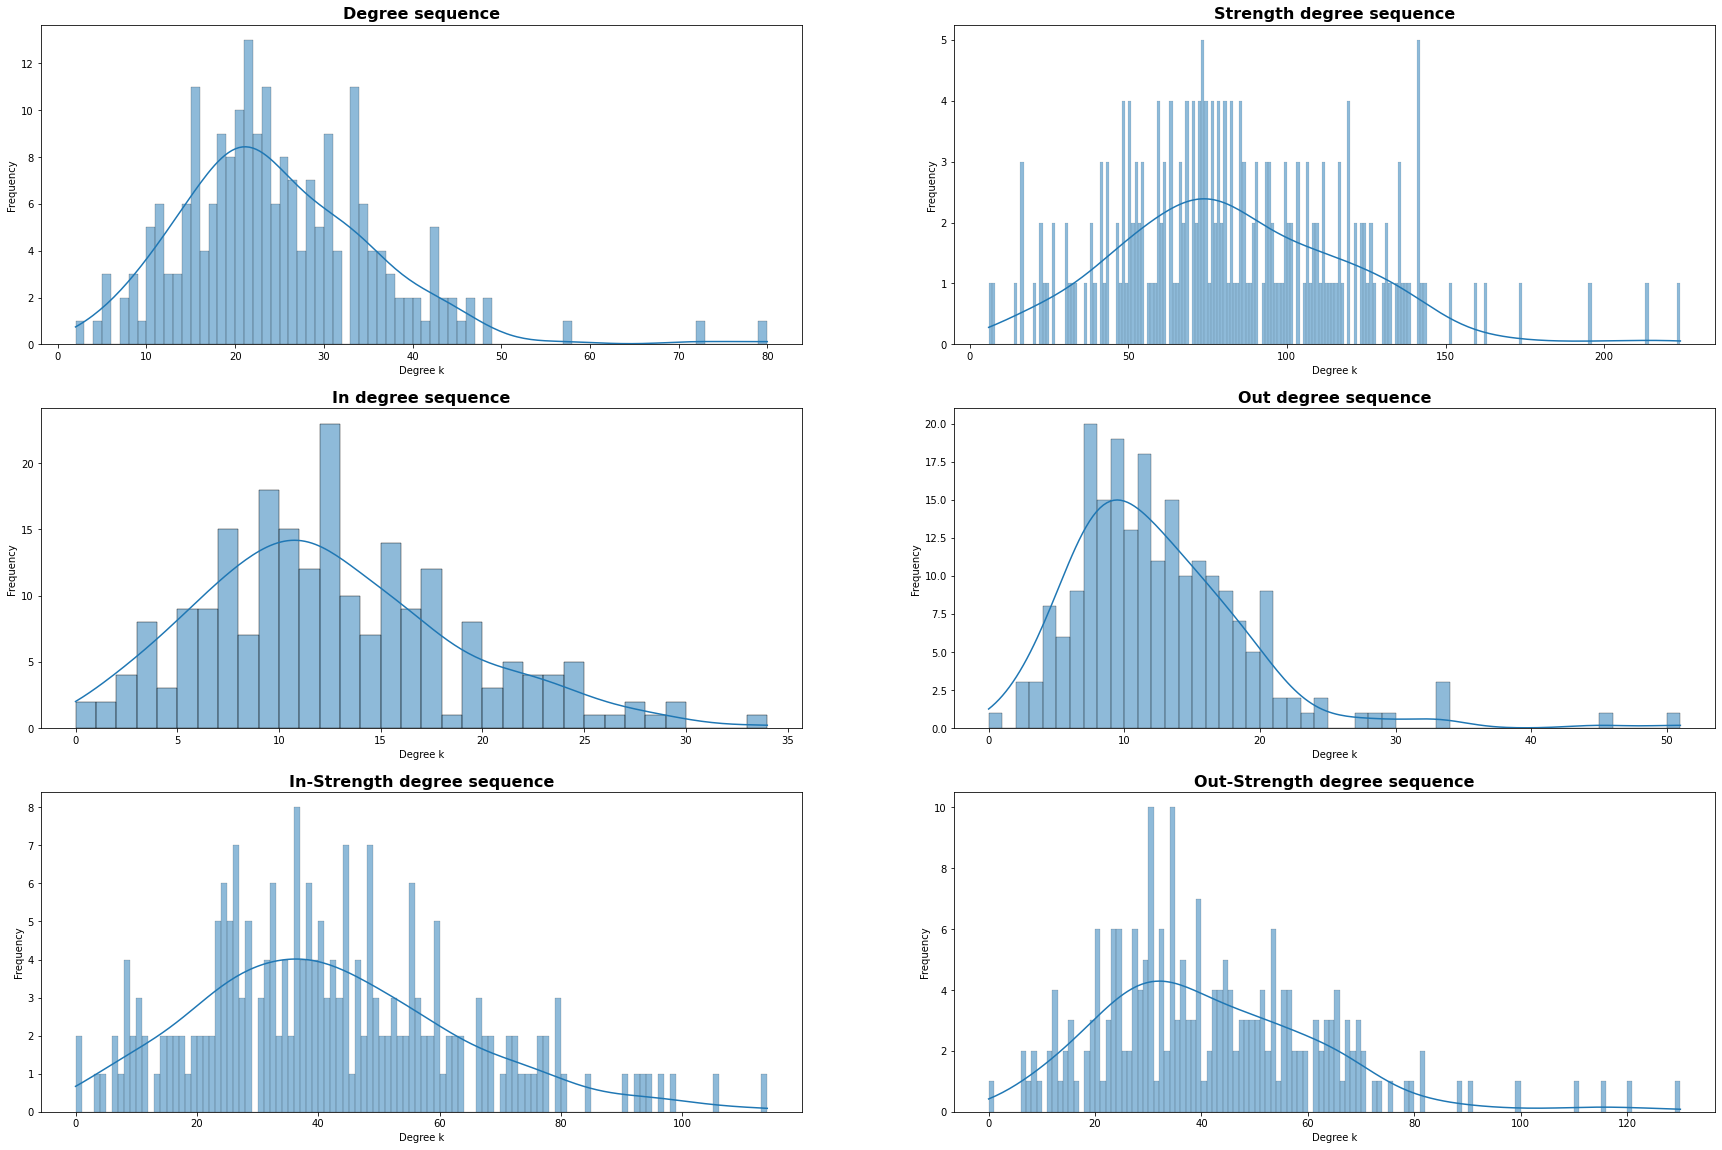

In [17]:
degree_map = {}
for k in degrees_sequences.keys():
    degree_counts = Counter(degrees_sequences[k])
    plot_x = list(np.arange(min(degree_counts.keys()), max(degree_counts.keys())+1))
    plot_y = [degree_counts.get(x, 0) for x in plot_x]
    degree_map[k] = { 'x': plot_x, 'y': plot_y}

titles = list(degrees_sequences.keys())

fig_degree, axes = plt.subplots(nrows=3, ncols=2)
for i, ax in enumerate(axes.flatten()):
    #ax.bar(degree_map[titles[i]][0],degree_map[titles[i]][1])
    sns.histplot(ax=ax, data=degrees_sequences[titles[i]], kde=True, stat='frequency', bins=degree_map[titles[i]]['x'])
    ax.set_title(titles[i],fontdict= { 'fontsize': 16, 'fontweight':'bold'})
    ax.set_xlabel("Degree k")
    ax.set_ylabel("Frequency")

fig_degree.figure.set_size_inches((30,20))

### Probability

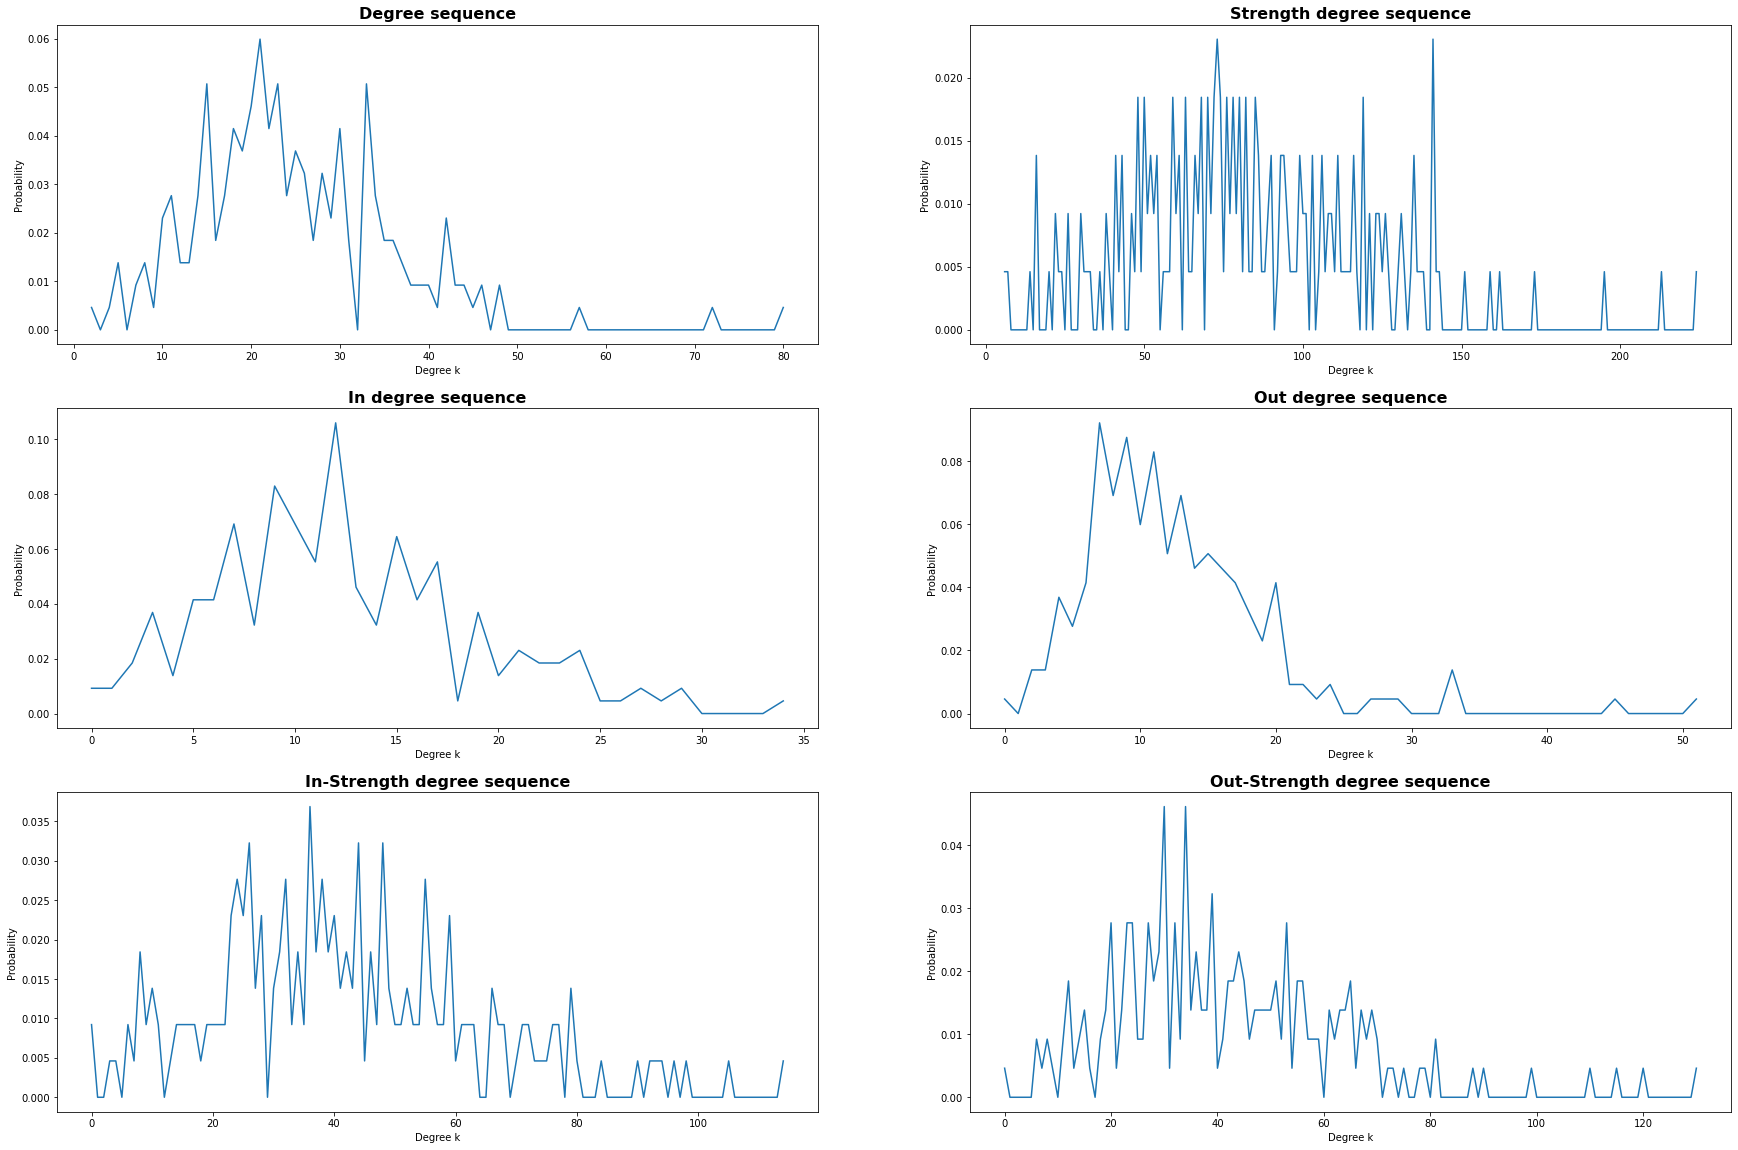

In [18]:
def get_degree_probability(degree_counts, min_degree, max_degree):
  degree_prob = {}

  for degree in np.arange(min_degree, max_degree + 1):
    if degree in degree_counts:
      num_nodes_degree = degree_counts[degree]
      prob = num_nodes_degree/num_nodes
      degree_prob[degree] = prob
    else:
      degree_prob[degree] = 0
  
  return degree_prob



fig_prob, axes = plt.subplots(nrows=3, ncols=2)
for i, ax in enumerate(axes.flatten()):
    #ax.bar(degree_map[titles[i]][0],degree_map[titles[i]][1])
    degree_counts = Counter(degrees_sequences[titles[i]])
    degree_probability = get_degree_probability(degree_counts,min(degree_counts.keys()), max(degree_counts.keys()))
    sns.lineplot(ax=ax, data=degree_probability)
    ax.set_title(titles[i],fontdict= { 'fontsize': 16, 'fontweight':'bold'})
    ax.set_xlabel("Degree k")
    ax.set_ylabel("Probability")
    ax.set_xscale('linear')
    ax.set_yscale('linear')

fig_prob.figure.set_size_inches((30,20))  


## Average link strenght 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

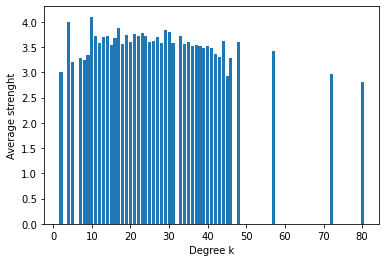

In [19]:
average_stonghnest = []

data={}

for n in G.nodes:
    average_stonghnest.append(G.degree(n, weight='weight')/G.degree(n))

#print(average_stonghnest)
plt.bar(degrees_sequences['Degree sequence'],average_stonghnest)

plt.xlabel("Degree k")
plt.ylabel("Average strenght")

plt.plot

# print(max(average_stonghnest))

# #data={'x':degrees_sequences['Degree sequence'], 'y':average_stonghnest}
# sns.displot(data=data, x='x', bins=len(average_stonghnest))
# plt.plot

# Power Law and Scale Free Regime

In [20]:
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(sigma_degree, mu_degree, sigma_degree) - norm.cdf(-sigma_degree, mu_degree, sigma_degree)
two_sd = norm.cdf(2 * sigma_degree, mu_degree, sigma_degree) - norm.cdf(-2 * sigma_degree, mu_degree, sigma_degree)
three_sd = norm.cdf(3 * sigma_degree, mu_degree, sigma_degree) - norm.cdf(-3 * sigma_degree, mu_degree, sigma_degree)
 
# printing the value of fractions
# within each band
cprint("Fraction of values within one SD:", 'blue', end=' ')
cprint(round(one_sd,2),'green')
cprint("Fraction of values within two SD:", 'blue', end=' ')
cprint(round(two_sd,2), 'green')
cprint("Fraction of values within three SD:", 'blue', end=' ') 
cprint(round(three_sd,2), "green")

if(one_sd==0.68 and two_sd==0.95 and three_sd==0.99):
    cprint('Bell shape distribution.', "green")
else:
    cprint('Doesn\'t fit Bell shape distribution.', "yellow")

Fraction of values within one SD: 0.17
Fraction of values within two SD: 0.52
Fraction of values within three SD: 0.85
Doesn't fit Bell shape distribution.


R is the loglikelihood ratio between the two candidate distributions. <br>
This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second
distribution. <br>
The significance value for that direction is p.

### In-degree

Calculating best minimal value for power law fit
Alpha: 8.85
xmin: 23.0


<Figure size 432x288 with 0 Axes>

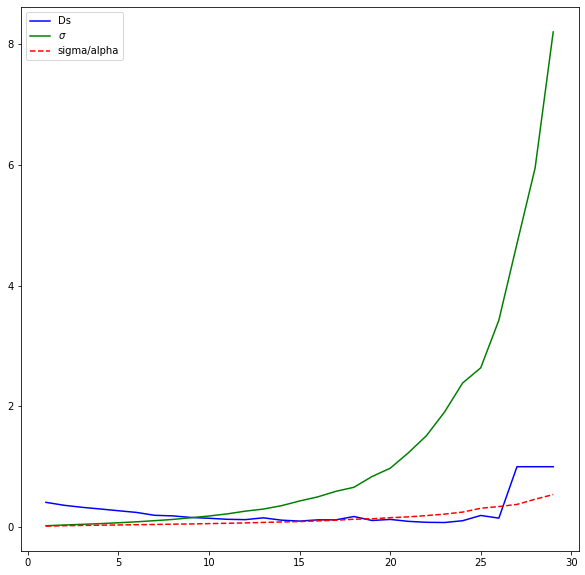

Exponential: R:-0.22 p:0.44
Lognormal: R:-0.16 p:0.46
Stretched exponential: R:-0.28 p:0.55
lognormal_positive: R:-0.16 p:0.46
Truncated Power-Law: R:0.01 p:0.88
Stretched-exponential vs Lognormal: R:0.12 p:0.67


Assuming nested distributions


In [21]:
sanitized_in_degrees= np.array(degrees_sequences['In degree sequence'])
sanitized_in_degrees=sanitized_in_degrees[sanitized_in_degrees!=0]


fit_in = powerlaw.Fit(sanitized_in_degrees,fit_method="KS", discrete=True) #sigma_threshold=.1
print("Alpha: " + str(round(fit_in.power_law.alpha,2)))
print("xmin: " + str(round(fit_in.power_law.xmin,2)))
#print(fit_in.xmins)

fig3 = plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fit_in.xmins, fit_in.Ds, color='b')
plt.plot(fit_in.xmins, fit_in.sigmas, color='g')
plt.plot(fit_in.xmins, fit_in.sigmas/fit_in.alphas, color='r',linestyle='--')
plt.legend(["Ds","$\sigma$","sigma/alpha"])
plt.show()


# fig2 = fit.plot_pdf(color='b', linewidth=2)
# fig3 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
# fig3.legend(["Probability density function","power law fit"])

R, p = fit_in.distribution_compare('power_law', 'exponential')
print ("Exponential: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_in.distribution_compare('power_law', 'lognormal')
print ("Lognormal: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))


R, p = fit_in.distribution_compare('power_law', 'stretched_exponential')
print ("Stretched exponential: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_in.distribution_compare('power_law', 'lognormal_positive')
print ("lognormal_positive: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))


R, p = fit_in.distribution_compare('power_law', 'truncated_power_law')
print ("Truncated Power-Law: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_in.distribution_compare('stretched_exponential', 'lognormal')
print ("Stretched-exponential vs Lognormal: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))




### Out-degree

Calculating best minimal value for power law fit
Alpha:4.58
xmin:15.0
Exponential: R:0.61 p:0.54
Lognormal: R:0.33 p:0.82
Truncated Power-Law: R:0.01 p:0.88
Exponential vs Lognormal: R:0.06 p:0.43


Assuming nested distributions


<Figure size 432x288 with 0 Axes>

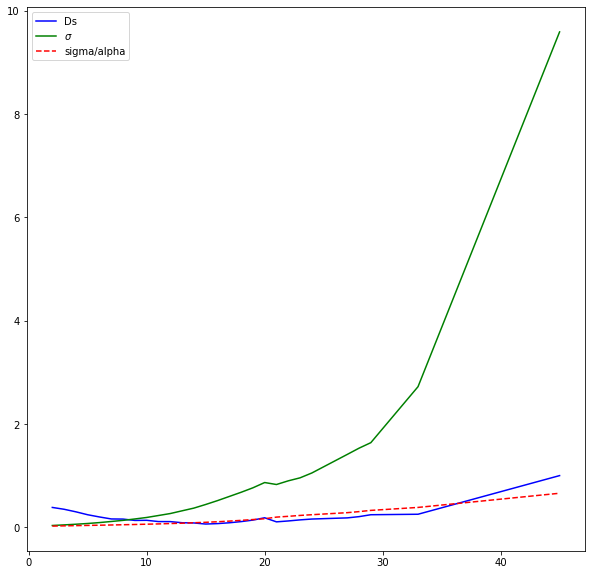

In [22]:
sanitized_out_degrees=np.array(degrees_sequences['Out degree sequence'])
sanitized_out_degrees=sanitized_out_degrees[sanitized_out_degrees!=0]


fit_out = powerlaw.Fit(sanitized_out_degrees,fit_method="KS", discrete=True) #sigma_threshold=.1
print("Alpha:" + str(round(fit_out.power_law.alpha,2)))
print("xmin:" + str(round(fit_out.power_law.xmin,2)))


R, p = fit_out.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print ("Exponential: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_out.distribution_compare('power_law', 'lognormal')
print ("Lognormal: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_in.distribution_compare('power_law', 'truncated_power_law')
print ("Truncated Power-Law: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))

R, p = fit_in.distribution_compare('exponential', 'lognormal')
print ("Exponential vs Lognormal: R:"+ str(round(R,2)) + " p:" +str(round(p,2)))



fig4 = plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fit_out.xmins, fit_out.Ds, color='b')
plt.plot(fit_out.xmins, fit_out.sigmas, color='g')
plt.plot(fit_out.xmins, fit_out.sigmas/fit_out.alphas, color='r',linestyle='--')
plt.legend(["Ds","$\sigma$","sigma/alpha"])
plt.show()

### Plot comparison

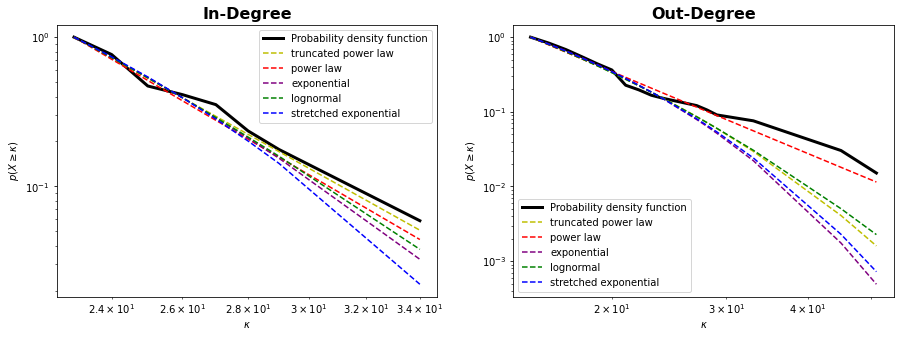

In [23]:
fig_power_law, axes = plt.subplots(nrows=1, ncols=2)

#In-degree
fit_in.plot_ccdf(ax=axes[0],linewidth=3, color='black')
fit_in.truncated_power_law.plot_ccdf(ax=axes[0], color='y', linestyle='--') #truncated_power_law
fit_in.power_law.plot_ccdf(ax=axes[0], color='r', linestyle='--') #powerlaw
fit_in.exponential.plot_ccdf(ax=axes[0], color='purple', linestyle='--') #exponential
fit_in.lognormal.plot_ccdf(ax=axes[0], color='g', linestyle='--') #lognormal
fit_in.stretched_exponential.plot_ccdf(ax=axes[0], color='b', linestyle='--') #stretched_exponential
axes[0].legend(["Probability density function","truncated power law","power law","exponential","lognormal","stretched exponential"])
axes[0].set_xlabel("$\kappa$")
axes[0].set_ylabel("$p(X \geq \kappa)$")
axes[0].set_title('In-Degree',fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#Out-degree
fit_out.plot_ccdf(ax=axes[1], linewidth=3, color='black')
fit_out.truncated_power_law.plot_ccdf(ax=axes[1], color='y', linestyle='--') #truncated_power_law
fit_out.power_law.plot_ccdf(ax=axes[1], color='r', linestyle='--') #powerlaw
fit_out.exponential.plot_ccdf(ax=axes[1], color='purple', linestyle='--') #exponential
fit_out.lognormal.plot_ccdf(ax=axes[1], color='g', linestyle='--') #lognormal
fit_out.stretched_exponential.plot_ccdf(ax=axes[1], color='b', linestyle='--') #stretched_exponential
axes[1].legend(["Probability density function","truncated power law","power law","exponential","lognormal","stretched exponential"])
axes[1].set_xlabel("$\kappa$")
axes[1].set_ylabel("$p(X \geq \kappa)$")
axes[1].set_title('Out-Degree',fontdict= { 'fontsize': 16, 'fontweight':'bold'})


fig_power_law.figure.set_size_inches((15,5))

In [24]:
print("Percentage of excluded In-degree:")
print(round(((len([i for i in degrees_sequences['In degree sequence'] if i < fit_in.power_law.xmin]))*100)/217,2))
print("Percentage of excluded Out-degree:")
print(round(((len([i for i in degrees_sequences['Out degree sequence'] if i < fit_out.power_law.xmin]))*100)/217,2))

Percentage of excluded In-degree:
92.17
Percentage of excluded Out-degree:
69.59


# Distance

## Average shortest path length

In [25]:
avg_short_path = nx.average_shortest_path_length(G)
cprint("Average shortest path length: ", 'blue', end=' ')
cprint(round(avg_short_path,2), 'green')

if(math.isclose(math.log(G.number_of_nodes(),10),avg_short_path,abs_tol=0.5)):
    cprint("Small-wordl", 'yellow')
else:
    cprint("NOT Small-wordl ", 'yellow')


Average shortest path length:  2.73
Small-wordl


## Shortest path length distribution

In [26]:
shortest_path_lengths = dict(nx.shortest_path_length(G))
#counting how many paths have certain length
shortest_length_counts = Counter()
for i in range(num_nodes):
    if(i!=0):
        shortest_length_counts.update(Counter(shortest_path_lengths[i].values()))

Text(0, 0.5, 'Number of paths')

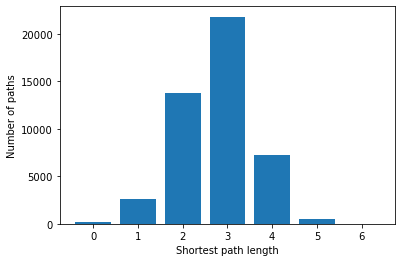

In [27]:
#shortest path length minimo e massimo
min_length, max_length = min(shortest_length_counts.keys()), max(shortest_length_counts.keys())

#asse x: shortest path length
shortest_length_plot_x = list(range(min_length, max_length + 1))

#asse y: num of paths
shortest_length_plot_y = [shortest_length_counts.get(x, 0) for x in shortest_length_plot_x]

plt.bar(shortest_length_plot_x, shortest_length_plot_y)

plt.xlabel("Shortest path length")
plt.ylabel("Number of paths")

Function that returns the probability that a path has a certain length:

In [28]:
def get_shortest_path_length_probability(shortest_length_counts, min_length, max_length):
  length_prob = {}
  num_path = sum(shortest_length_counts.values())

  for length in range(min_length, max_length + 1):
    if length in shortest_length_counts:
      num_path_length = shortest_length_counts[length]
      prob = num_path_length/num_path
      length_prob[length] = prob
    else:
      length_prob[length] = 0
  
  return length_prob

Text(0, 0.5, 'Shortest path length probability')

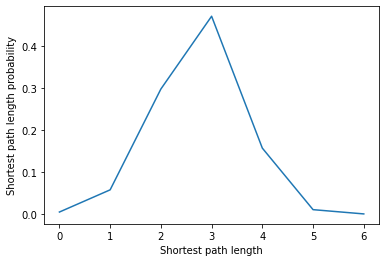

In [29]:
length_probability = get_shortest_path_length_probability(shortest_length_counts, min_length, max_length)

shortest_length_plot_y_prob = [length_probability[x] for x in shortest_length_plot_x]

plt.plot(shortest_length_plot_x, shortest_length_plot_y_prob)
plt.xlabel("Shortest path length")
plt.ylabel("Shortest path length probability")

# Diameter

Diameter of the largest strongly connected component:

In [30]:
strongly_components = list(nx.strongly_connected_components(G))
largest_strongly = max(strongly_components, key=len)
diameter = nx.diameter(G.subgraph(largest_strongly))

In [31]:
cprint("Diameter:", 'blue', end=' ')
cprint(diameter, 'green')

Diameter: 6


# Clustering coefficient

Clustering Coefficient of nodes, that is the fraction of pairs of the node’s neighbors that are connected to each other.

For weighted clustering coefficienti see documentation https://arxiv.org/pdf/cond-mat/0408629.pdf

In [32]:
clustering_coefficient = nx.clustering(G)
weighted_clustering_coefficient = nx.clustering(G, weight='weight')

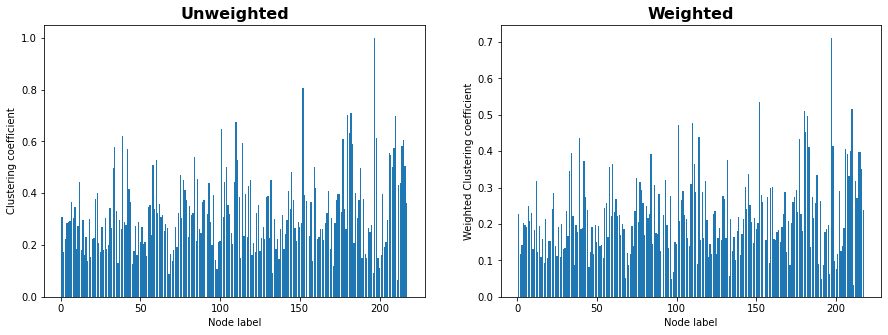

In [33]:
#Creating figure area
fig_clustering, axes = plt.subplots(nrows=1, ncols=2)
#Clustering min max
min_clustering, max_clustering = min(clustering_coefficient.keys()), max(clustering_coefficient.keys())
clustering_plot_x = list(range(min_clustering, max_clustering + 1))
clustering_plot_y = [clustering_coefficient[key] for key in clustering_plot_x]
axes[0].bar(clustering_plot_x, clustering_plot_y)
axes[0].set_xlabel('Node label')
axes[0].set_ylabel('Clustering coefficient')
axes[0].set_title('Unweighted',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
#Weighted clustering min and max
min_clustering, max_clustering = min(weighted_clustering_coefficient.keys()), max(weighted_clustering_coefficient.keys())
clustering_plot_x = list(range(min_clustering, max_clustering + 1))
clustering_plot_y = [weighted_clustering_coefficient[key] for key in clustering_plot_x]
axes[1].bar(clustering_plot_x, clustering_plot_y)
axes[1].set_xlabel('Node label')
axes[1].set_ylabel('Weighted Clustering coefficient')
axes[1].set_title('Weighted',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
fig_clustering.figure.set_size_inches((15,5))

In [34]:
avg_clustering = nx.average_clustering(G)
weighted_avg_clustering = nx.average_clustering(G, weight='weight')
cprint("Average weighted clustering coefficient:", 'blue', end=' ')
cprint(round(weighted_avg_clustering, 4), 'green')
cprint("Average clustering coefficient:", 'blue', end=' ')
cprint(round(avg_clustering, 4), 'green')

Average weighted clustering coefficient: 0.2198
Average clustering coefficient: 0.3196


## Triangles

Number of triangles that include a node as a vertex.<br>
Graph is trasformed to undirected.<br>
When calculating the number of triangles for the whole graph, each triangle is counted 3 times, one for each node.<br>
Self loops are ignored.

In [35]:
triangles = nx.triangles(G.to_undirected())
num_triangles = sum(triangles.values())
cprint("Triangle counts:", 'blue', end=' ')
cprint(int(num_triangles/3), 'green')

Triangle counts: 3629
